In [1]:
import math

import pandas as pd
import numpy as np

import semopy as sem
import graphviz

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Artificial data

## set seed
np.random.seed(0)

## sample size
N = 200

## TVCM
TV_CM = np.random.normal(50, 10, N)

## Temperature(℃)
Temperature_C = np.random.uniform(10, 35, N)

## Noise
Noise = np.random.normal(0, 5, N)

## Sales (Objective)
Soda_Sales = 10 + 0.5 * TV_CM + 2.0 * Temperature_C + Noise

## dataframe
data = pd.DataFrame({
    'TV_CM': TV_CM,
    'Temperature_C': Temperature_C,
    'Soda_Sales': Soda_Sales
})

data.head()

,TV_CM,Temperature_C,Soda_Sales
0,67.640523,34.048409,114.809688
1,54.001572,17.303688,73.356435
2,59.787380,16.020719,68.114409
3,72.408932,12.507349,64.030206
4,68.675580,10.410741,71.981931


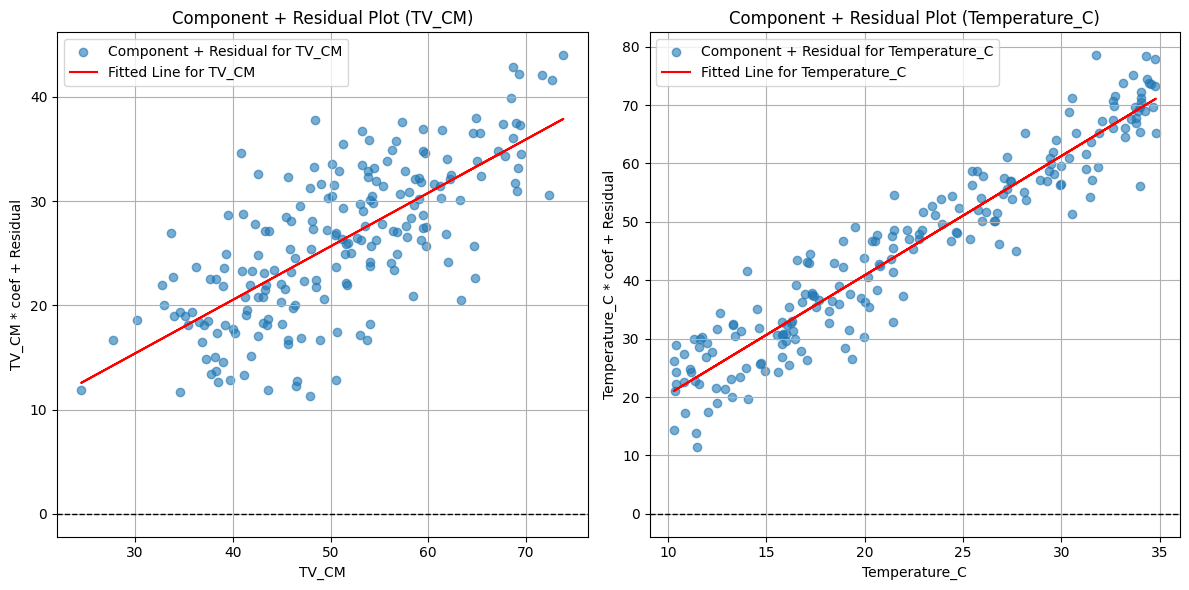

In [3]:
# Linearity Check: CPR

def component_plus_residual_plot(df, x_cols, y_col):
    # Define independent and dependent variables
    X = df[x_cols]  # Use multiple independent variables
    X = sm.add_constant(X)  # Add intercept term
    y = df[y_col]
    
    # Fit the multiple linear regression model
    model = sm.OLS(y, X).fit()
    
    num_vars = len(x_cols)
    rows = math.ceil(num_vars / 2)  # Arrange plots in a grid (2 columns)
    cols = 2 if num_vars > 1 else 1
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    for i, x_col in enumerate(x_cols):
        # Compute component + residual for the selected variable
        component = df[x_col] * model.params[x_col]
        partial_residual = component + model.resid
        
        # Plot Component + Residual Plot for each independent variable
        ax = axes[i]
        ax.scatter(df[x_col], partial_residual, alpha=0.6, label=f"Component + Residual for {x_col}")
        ax.plot(df[x_col], component, color='red', label=f"Fitted Line for {x_col}")
        ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
        
        ax.set_xlabel(x_col)
        ax.set_ylabel(f"{x_col} * coef + Residual")
        ax.set_title(f"Component + Residual Plot ({x_col})")
        ax.legend()
        ax.grid(True)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

component_plus_residual_plot(data, ['TV_CM', 'Temperature_C'], 'Soda_Sales')

In [4]:
# SEM model
model_desc = '''
Soda_Sales ~ TV_CM + Temperature_C
'''

In [5]:
# SEM estimation
model = sem.Model(model_desc)
result = model.fit(data)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 12
Params: 0.513 2.043 26.145


In [6]:
# Performance Inspection
stats = sem.calc_stats(model)
print(stats.T)

ins = model.inspect()
print(ins)

                      Value
DoF            3.000000e+00
DoF Baseline   5.000000e+00
chi2           1.050434e-04
chi2 p-value   9.999997e-01
chi2 Baseline  4.891441e+02
CFI            1.006196e+00
GFI            9.999998e-01
AGFI           9.999996e-01
NFI            9.999998e-01
TLI            1.010327e+00
RMSEA          0.000000e+00
AIC            5.999999e+00
BIC            1.589495e+01
LogLik         5.252169e-07
         lval  op           rval   Estimate  Std. Err    z-value  p-value
0  Soda_Sales   ~          TV_CM   0.513118  0.035408  14.491412      0.0
1  Soda_Sales   ~  Temperature_C   2.043452  0.047345  43.160776      0.0
2  Soda_Sales  ~~     Soda_Sales  26.145319  2.614532  10.000000      0.0


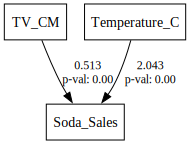

In [7]:
# Visualize
sem.semplot(model, 'figures/sem.png')

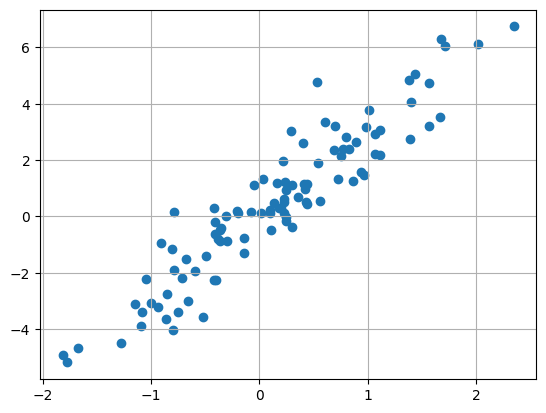

In [12]:
x = np.random.normal(0, 1, 100)
y = 3.0 * x + np.random.normal(0, 1, 100)

plt.grid()
plt.scatter(x,y)

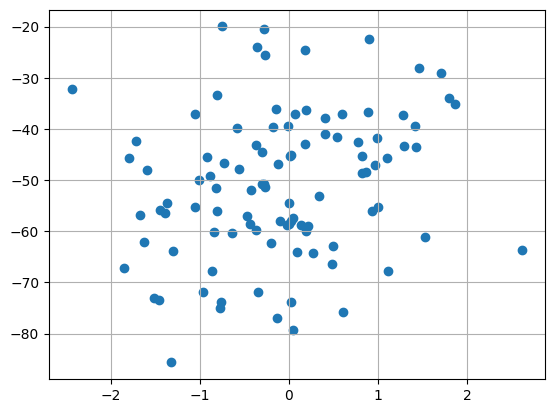

In [15]:
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(10, 3, 100)
y = 3.0 * x1 + -5.0 * x2 + np.random.normal(0, 1, 100)

plt.grid()
plt.scatter(x1,y)

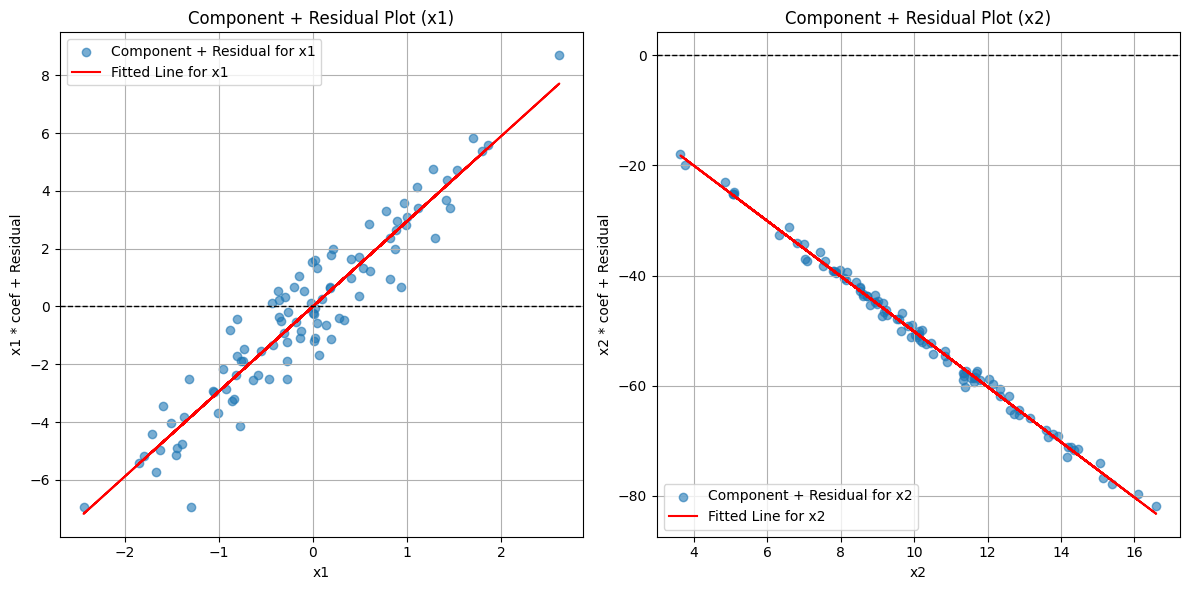

In [16]:
d = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y
})

component_plus_residual_plot(d, ['x1', 'x2'], 'y')